<a href="https://colab.research.google.com/github/iamRahulB/python-practice/blob/main/CNN_FROM_SCRATCH_USING_PYTORCH_ACCURACY_87_FASHIONMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
device=("cuda" if torch.cuda.is_available() else False)
device

'cuda'

In [ ]:
#  import datasets for image classification

train_data =datasets.FashionMNIST("data",
                                  train=True,
                                  transform=transforms.ToTensor(),
                                  target_transform=None,
                                  download=True)

test_data=datasets.FashionMNIST("data",
                                train=False,
                                transform=transforms.ToTensor(),
                                target_transform=None,
                                download=True)

In [ ]:
# so train_data has 2 columns , 1 is image and 2nd is lables
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:

import pandas as pd

data = []
for i in range(len(train_data)):
  image, label = train_data[i]
  data.append([image, label])

df = pd.DataFrame(data, columns=['Image', 'Label'])

print(df.head())

                                               Image  Label
0  [[[tensor(0.), tensor(0.), tensor(0.), tensor(...      9
1  [[[tensor(0.), tensor(0.), tensor(0.), tensor(...      0
2  [[[tensor(0.), tensor(0.), tensor(0.), tensor(...      0
3  [[[tensor(0.), tensor(0.), tensor(0.), tensor(...      3
4  [[[tensor(0.), tensor(0.), tensor(0.), tensor(...      0


In [ ]:
#  to see dictionary map of classes and targets we can do following thing

class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data[0][0].shape

#  image has 1 color channel and hight and width

torch.Size([1, 28, 28])

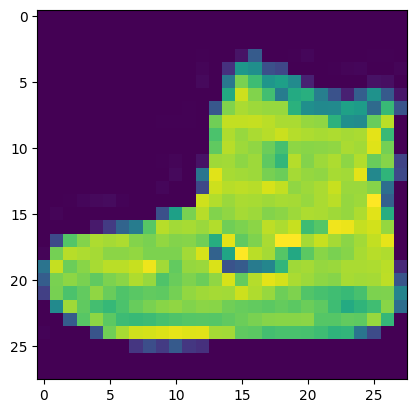

In [ ]:
plt.imshow(train_data[0][0].squeeze())

# so squeeze removes one dim and we can see our image has 1 color channle so we can remove that.


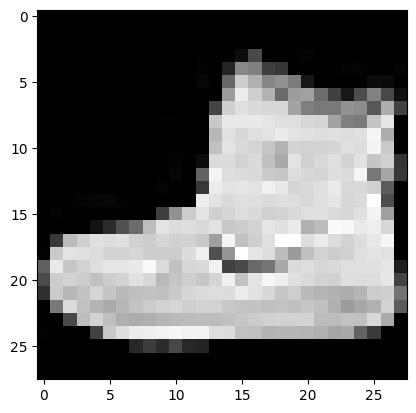

In [ ]:
plt.imshow(train_data[0][0].squeeze(),cmap='gray')

#  using cmap we can change the image into black white nd this is what we need.

In [ ]:
import random

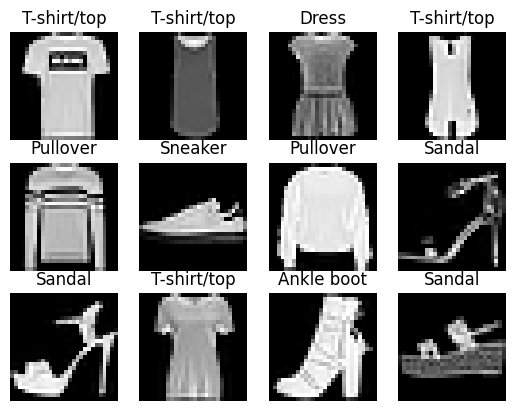

In [ ]:
for i in range(1,13):
    image,label=train_data[i]
    plt.subplot(3,4,i)
    plt.imshow(image.squeeze(),cmap='gray')
    plt.title(train_data.classes[label])
    plt.axis('off')

In [ ]:
torch.randint(0,5,size=[1]).item()

3

# preapare dataloader
1.   our data is in pytorch datasets
2.   we need convert datasets into dataloader to make it iterable
3.  also we neeed to make batches to fit in memory : so model will have chance to update gradients (weight , bias )



In [ ]:
#  remember to shuffle the data in dataloader so model will not remember the order
#  ssuppose first 32 images are only pant images so model will not perform good.
#  we need randon image batches.

In [ ]:
from torch.utils.data import DataLoader

batch_size=32

train_loader=DataLoader(dataset=train_data,
                        shuffle=True,
                        batch_size=batch_size,)

test_loader=DataLoader(dataset=test_data,
                       shuffle=False,
                       batch_size=batch_size)


#  shuffle in test is false as we are just checking model performance so it doesnt learn anything from test so False


In [ ]:
#  print loaders

print(f" Length of train_loader : {len(train_loader)} with batch size : {batch_size}")
print(f" Length of test_loader : {len(test_loader)} with batch size : {batch_size}")

 Length of train_loader : 1875 with batch size : 32
 Length of test_loader : 313 with batch size : 32


In [ ]:
train_feature_batch, train_label_batch=next(iter(train_loader))

train_feature_batch.shape, train_label_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Above code follows order NCHW -> batch, channel, hight , width

In [ ]:
flatten_layer=nn.Flatten()

image_next=next(iter(train_loader))[0][0]
image_shape_in_loader=image_next.shape

print(f"Image shape in loader : {image_shape_in_loader}")

output=flatten_layer(image_next)

print(f"Image shape after flatten : {output.shape}")

Image shape in loader : torch.Size([1, 28, 28])
Image shape after flatten : torch.Size([1, 784])


we can see above after flattening image how all the pixels are arranged in a strip




In [ ]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [ ]:

class CNNModel(nn.Module):
    def __init__(self, input_channels, output_shape):
        super(CNNModel, self).__init__()
        self.first_stack = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=3, padding=1), # Added padding=1 to the first Conv2d layer
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.second_stack = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # Added padding=1 to the second Conv2d layer
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(7 * 7 * 64, 128), # Adjusted the input size of the Linear layer
            nn.ReLU(),
            nn.Linear(128, output_shape)
        )

    def forward(self, x):
        x = self.first_stack(x)
        x = self.second_stack(x)
        x = self.classifier(x)
        return x

In [ ]:
torch.manual_seed(42)
model=CNNModel(input_channels=1,output_shape=len(train_data.classes))
model.to(device)

CNNModel(
  (first_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (second_stack): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [ ]:
from torchsummary import summary

summary(model,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          18,496
              ReLU-5           [-1, 64, 14, 14]               0
         MaxPool2d-6             [-1, 64, 7, 7]               0
           Flatten-7                 [-1, 3136]               0
            Linear-8                  [-1, 128]         401,536
              ReLU-9                  [-1, 128]               0
           Linear-10                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 1.61
Estimated T

In [ ]:
#  in flatten layer it gave error -->  mat1 and mat2 shapes cannot be multiplied (2x576 and 1152x156) so --> 576 is the actual size we need to pass after flatten layer

In [ ]:
check_image=next(iter(train_loader))
print(check_image[0].shape)

print(check_image[1])

torch.Size([32, 1, 28, 28])
tensor([2, 7, 8, 3, 0, 2, 3, 5, 6, 0, 6, 5, 7, 3, 7, 4, 4, 3, 7, 1, 4, 8, 7, 4,
        1, 5, 4, 5, 2, 9, 7, 9])


In [ ]:
with torch.inference_mode():
    check=model(check_image[0].to(device))

check.argmax(dim=1)

tensor([4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        8, 8, 4, 0, 4, 3, 4, 4], device='cuda:0')

In [ ]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Assuming model, train_loader, and test_loader are already defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.01)

epochs =10

for epoch in range(epochs):
    model.train()
    avg_train_loss = 0
    avg_train_acc = 0
    for batch, (X_train, y_train) in enumerate(train_loader):
        X_train, y_train = X_train.to(device), y_train.to(device)
        train_batch_logits = model(X_train)

        train_batch_preds = train_batch_logits.argmax(dim=1)

        train_batch_loss = loss_fn(train_batch_logits, y_train)

        train_batch_acc = accuracy_score(y_train.cpu(), train_batch_preds.cpu())

        optimizer.zero_grad()
        train_batch_loss.backward()
        optimizer.step()

        avg_train_loss += train_batch_loss.item()
        avg_train_acc += train_batch_acc

        if batch % 300 == 0:  # Adjust the frequency as needed
            print(f"Batch {batch} | Loss: {train_batch_loss.item():.4f} | Acc: {train_batch_acc * 100:.2f}%")

    model.eval()

    avg_test_loss = 0
    avg_test_acc = 0
    # Model evaluation
    with torch.inference_mode():
        for X_test, y_test in tqdm(test_loader, desc="Evaluating"):
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_logits = model(X_test)

            test_preds = test_logits.argmax(dim=1)
            test_loss = loss_fn(test_logits, y_test)

            test_acc = accuracy_score(y_test.cpu(), test_preds.cpu())

            avg_test_loss += test_loss.item()
            avg_test_acc += test_acc

    # Calculate average loss and accuracy
    avg_train_loss /= len(train_loader)
    avg_train_acc /= len(train_loader)
    avg_test_loss /= len(test_loader)
    avg_test_acc /= len(test_loader)

    print(f"Epoch: {epoch} | Train Loss: {avg_train_loss:.4f} | Train Acc: {avg_train_acc * 100:.2f}% | Test Loss: {avg_test_loss:.4f} | Test Acc: {avg_test_acc * 100:.2f}%")


Batch 0 | Loss: 2.2938 | Acc: 25.00%
Batch 300 | Loss: 0.7381 | Acc: 71.88%
Batch 600 | Loss: 0.2731 | Acc: 90.62%
Batch 900 | Loss: 0.3069 | Acc: 90.62%
Batch 1200 | Loss: 0.6183 | Acc: 75.00%
Batch 1500 | Loss: 0.2159 | Acc: 84.38%
Batch 1800 | Loss: 0.2763 | Acc: 87.50%


Evaluating: 100%|██████████| 313/313 [00:01<00:00, 215.40it/s]


Epoch: 0 | Train Loss: 0.4345 | Train Acc: 84.08% | Test Loss: 0.3462 | Test Acc: 87.34%
Batch 0 | Loss: 0.3336 | Acc: 84.38%
Batch 300 | Loss: 0.1592 | Acc: 93.75%
Batch 600 | Loss: 0.1526 | Acc: 93.75%
Batch 900 | Loss: 0.4140 | Acc: 84.38%
Batch 1200 | Loss: 0.2163 | Acc: 96.88%
Batch 1500 | Loss: 0.2899 | Acc: 87.50%
Batch 1800 | Loss: 0.2582 | Acc: 87.50%


Evaluating: 100%|██████████| 313/313 [00:01<00:00, 209.88it/s]


Epoch: 1 | Train Loss: 0.3296 | Train Acc: 87.76% | Test Loss: 0.3414 | Test Acc: 87.88%
Batch 0 | Loss: 0.3531 | Acc: 84.38%
Batch 300 | Loss: 0.5031 | Acc: 87.50%
Batch 600 | Loss: 0.2794 | Acc: 90.62%
Batch 900 | Loss: 0.2982 | Acc: 90.62%
Batch 1200 | Loss: 0.2477 | Acc: 90.62%
Batch 1500 | Loss: 0.8046 | Acc: 84.38%
Batch 1800 | Loss: 0.3001 | Acc: 87.50%


Evaluating: 100%|██████████| 313/313 [00:01<00:00, 158.03it/s]


Epoch: 2 | Train Loss: 0.3081 | Train Acc: 88.43% | Test Loss: 0.3349 | Test Acc: 87.98%
Batch 0 | Loss: 0.4063 | Acc: 75.00%
Batch 300 | Loss: 0.1800 | Acc: 93.75%
Batch 600 | Loss: 0.6103 | Acc: 78.12%
Batch 900 | Loss: 0.1932 | Acc: 90.62%
Batch 1200 | Loss: 0.1210 | Acc: 93.75%
Batch 1500 | Loss: 0.3281 | Acc: 90.62%
Batch 1800 | Loss: 0.2182 | Acc: 93.75%


Evaluating: 100%|██████████| 313/313 [00:01<00:00, 165.26it/s]


Epoch: 3 | Train Loss: 0.3013 | Train Acc: 88.77% | Test Loss: 0.3673 | Test Acc: 87.83%
Batch 0 | Loss: 0.1544 | Acc: 93.75%
Batch 300 | Loss: 0.4657 | Acc: 78.12%
Batch 600 | Loss: 0.1188 | Acc: 93.75%
Batch 900 | Loss: 0.5693 | Acc: 78.12%
Batch 1200 | Loss: 0.0702 | Acc: 96.88%
Batch 1500 | Loss: 0.2103 | Acc: 93.75%
Batch 1800 | Loss: 0.4705 | Acc: 78.12%


Evaluating: 100%|██████████| 313/313 [00:01<00:00, 213.11it/s]


Epoch: 4 | Train Loss: 0.2883 | Train Acc: 89.21% | Test Loss: 0.3389 | Test Acc: 87.96%
Batch 0 | Loss: 0.1437 | Acc: 93.75%
Batch 300 | Loss: 0.1460 | Acc: 93.75%
Batch 600 | Loss: 0.2570 | Acc: 87.50%
Batch 900 | Loss: 0.4920 | Acc: 84.38%
Batch 1200 | Loss: 0.1711 | Acc: 90.62%
Batch 1500 | Loss: 0.2531 | Acc: 84.38%
Batch 1800 | Loss: 0.3038 | Acc: 87.50%


Evaluating: 100%|██████████| 313/313 [00:01<00:00, 194.45it/s]


Epoch: 5 | Train Loss: 0.2845 | Train Acc: 89.51% | Test Loss: 0.3611 | Test Acc: 87.51%
Batch 0 | Loss: 0.1980 | Acc: 90.62%
Batch 300 | Loss: 0.1073 | Acc: 96.88%
Batch 600 | Loss: 0.0630 | Acc: 100.00%
Batch 900 | Loss: 0.3435 | Acc: 84.38%
Batch 1200 | Loss: 0.2536 | Acc: 90.62%
Batch 1500 | Loss: 0.0977 | Acc: 96.88%
Batch 1800 | Loss: 0.2573 | Acc: 93.75%


Evaluating: 100%|██████████| 313/313 [00:01<00:00, 215.71it/s]


Epoch: 6 | Train Loss: 0.2758 | Train Acc: 89.76% | Test Loss: 0.3366 | Test Acc: 88.14%
Batch 0 | Loss: 0.3630 | Acc: 87.50%
Batch 300 | Loss: 0.2873 | Acc: 84.38%
Batch 600 | Loss: 0.5181 | Acc: 87.50%
Batch 900 | Loss: 0.3279 | Acc: 90.62%
Batch 1200 | Loss: 0.1345 | Acc: 96.88%
Batch 1500 | Loss: 0.2254 | Acc: 93.75%
Batch 1800 | Loss: 0.3610 | Acc: 87.50%


Evaluating: 100%|██████████| 313/313 [00:01<00:00, 206.72it/s]


Epoch: 7 | Train Loss: 0.2743 | Train Acc: 89.81% | Test Loss: 0.3323 | Test Acc: 88.25%
Batch 0 | Loss: 0.4838 | Acc: 81.25%
Batch 300 | Loss: 0.2348 | Acc: 93.75%
Batch 600 | Loss: 0.2511 | Acc: 90.62%
Batch 900 | Loss: 0.2556 | Acc: 87.50%
Batch 1200 | Loss: 0.2294 | Acc: 90.62%
Batch 1500 | Loss: 0.7580 | Acc: 71.88%
Batch 1800 | Loss: 0.2467 | Acc: 93.75%


Evaluating: 100%|██████████| 313/313 [00:01<00:00, 210.39it/s]


Epoch: 8 | Train Loss: 0.2689 | Train Acc: 89.87% | Test Loss: 0.3235 | Test Acc: 89.37%
Batch 0 | Loss: 0.2456 | Acc: 93.75%
Batch 300 | Loss: 0.1369 | Acc: 93.75%
Batch 600 | Loss: 0.2625 | Acc: 87.50%
Batch 900 | Loss: 0.1025 | Acc: 96.88%
Batch 1200 | Loss: 0.1464 | Acc: 93.75%
Batch 1500 | Loss: 0.0765 | Acc: 96.88%
Batch 1800 | Loss: 0.2490 | Acc: 90.62%


Evaluating: 100%|██████████| 313/313 [00:01<00:00, 199.20it/s]

Epoch: 9 | Train Loss: 0.2634 | Train Acc: 90.23% | Test Loss: 0.3641 | Test Acc: 87.72%


In [ ]:
# tensor([6, 3, 6, 8, 1, 7, 3, 6, 9, 6, 4, 1, 5, 4, 8, 4, 5, 1, 6, 1, 7, 4, 0, 2,
        # 5, 6, 5, 2, 8, 7, 1, 2])


with torch.inference_mode():
    check=model(check_image[0])

check.argmax(dim=1)

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [ ]:
import requests

files=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")

with open("helper_function.py","wb") as f:
    f.write(files.content)

In [ ]:
from helper_function import plot_decision_boundary

In [ ]:
plot_decision_boundary(model,)

In [ ]:
128* 9